In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [2]:
#reading the csv into dataframe
lead_score=pd.read_csv('Leads.csv')
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#inspecting dataframe
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead_score = lead_score.replace('Select',np.nan)

In [5]:
#checking the count of unique observation in each column - 9240 rows in total present
lead_score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [6]:
#drop column with only one value
lead_score1= lead_score.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [7]:
#checking for null values
lead_score1.isnull().sum()/len(lead_score1)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Inference
- City and Specialization are not dropped even though they are having null values >30% as they may be important in modelling
- dropping other columns with null values >30%

In [8]:
#dropping all columns with null percntage > 30%
lead_score1=lead_score1.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education'],axis=1)
lead_score1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Better Career Prospects,No,No,No,No,No,No,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Better Career Prospects,No,No,No,No,No,No,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [9]:
#checking for null values
lead_score1.isnull().sum()/len(lead_score1)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [10]:
## changing other values of other column having null value less than 30% 
lead_score1['Specialization'] = lead_score1['Specialization'].fillna('no values') 
#lead_score1['How did you hear about X Education'] = lead_score1['How did you hear about X Education'].fillna('no values') 
lead_score1['What is your current occupation'] = lead_score1['What is your current occupation'].fillna('no values')
lead_score1['What matters most to you in choosing a course'] = lead_score1['What matters most to you in choosing a course'].fillna('no values')
lead_score1['Country'] = lead_score1['Country'].fillna('no values')
lead_score1['City'] = lead_score1['City'].fillna('no values')


In [11]:
#rechecking for null values
lead_score1.isnull().sum()/len(lead_score1)*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [12]:
#checking the values of country 
lead_score1.Country.value_counts()

India                   6492
no values               2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Sweden                     3
Netherlands                2
Italy                      2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Philippines                2
Uganda                     2
China                      2
Ghana                      2
Denmark                    1
Liberia                    1
Tanzania                   1
Kenya                      1
Switzerland                1
Russia        

In [13]:
## Inference since most of values are from India and other is no values so we can mapp all other countries into one value as
#"Other country"


def country_rename(x):
    if x=='India':
        x='India'
    elif x=='no values':
        x='no values'
    else:
        x ='Other Country'
    return x    

lead_score1.Country=lead_score1.Country.apply(lambda x: country_rename(x))
lead_score1.Country.value_counts()

India            6492
no values        2461
Other Country     287
Name: Country, dtype: int64

In [14]:
#checking the values of city 
lead_score1.City.value_counts()

no values                      3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
lead_score1.isnull().sum()/len(lead_score1)*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [16]:
#Removing all null values
lead_score1=lead_score1[lead_score1.isnull().sum(axis=1)<1]

In [17]:
## rechecking if nay null values exist
# there should not be any null values
lead_score1.isnull().sum()/len(lead_score1)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

## Univariate Analysis

In [18]:
lead_score1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

In [19]:
lead_score1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Better Career Prospects,No,No,No,No,No,No,no values,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Better Career Prospects,No,No,No,No,No,No,no values,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


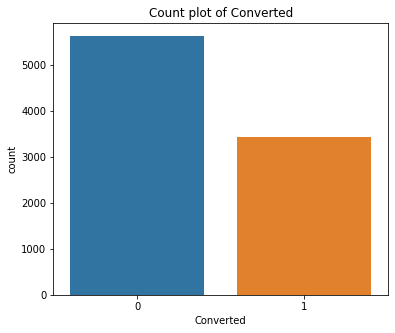

In [20]:
# count plot of converted 
plt.figure(figsize=(6,5))
sns.countplot(lead_score1.Converted)

plt.title('Count plot of Converted')
plt.show()

## Inference
- Plot show conversion rate is less, which needs to be improved

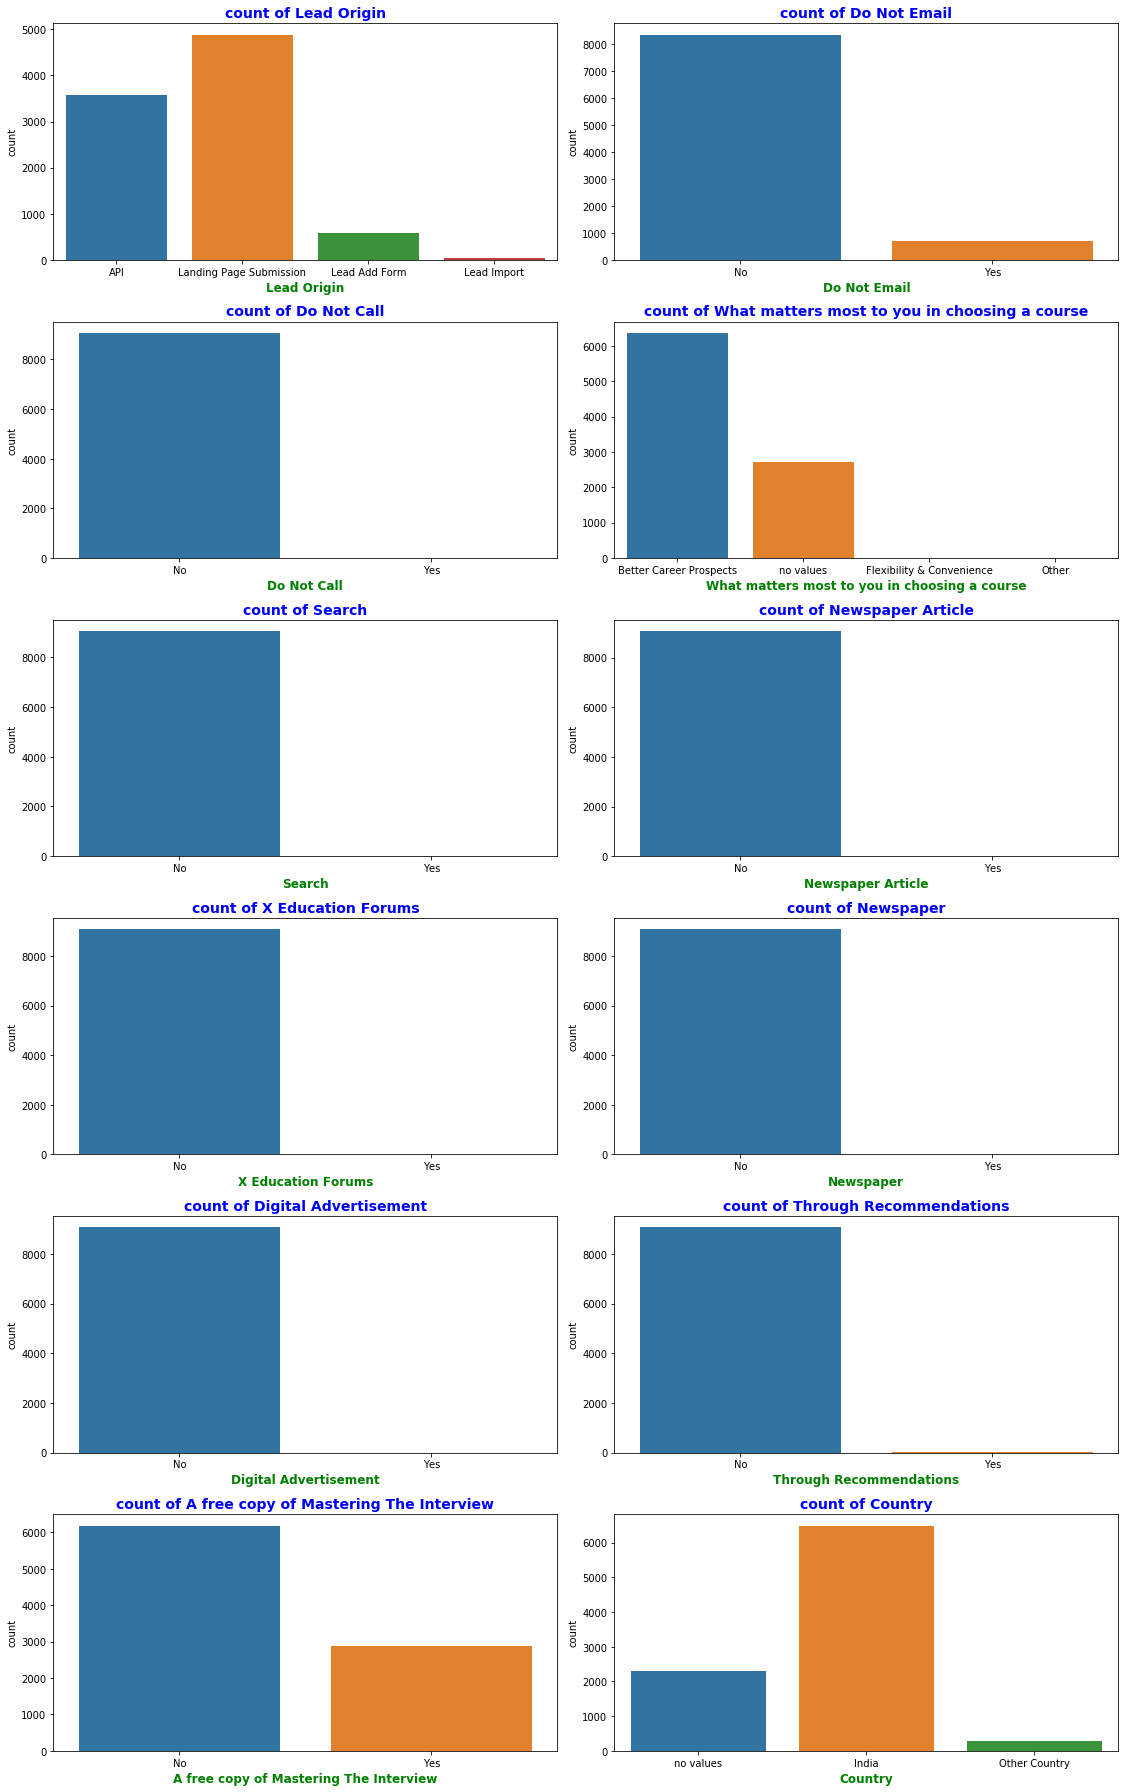

In [21]:
#count plot of all categorical data
col=['Lead Origin','Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Country']
plt.figure(figsize=(16,25))
for i in enumerate(col):
        plt.subplot(6,2,i[0]+1)
        plt.title('count of'+' '+ i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.countplot(lead_score1[i[1]])
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

In [22]:
cols=['Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
for i in enumerate(cols):
    print(i[1])
    print(lead_score1[i[1]].value_counts())

Do Not Email
No     8358
Yes     716
Name: Do Not Email, dtype: int64
Do Not Call
No     9072
Yes       2
Name: Do Not Call, dtype: int64
What matters most to you in choosing a course
Better Career Prospects      6370
no values                    2702
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64
Search
No     9060
Yes      14
Name: Search, dtype: int64
Newspaper Article
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
X Education Forums
No     9073
Yes       1
Name: X Education Forums, dtype: int64
Newspaper
No     9073
Yes       1
Name: Newspaper, dtype: int64
Digital Advertisement
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
Through Recommendations
No     9067
Yes       7
Name: Through Recommendations, dtype: int64


## Inference
- From above plots all these columns have bias towards one value and might not be useful in training a model and is proven by above cell values of value counts
    - Do Not Email
    - Do Not Call
    - What matters most to you in choosing a course
    - Search
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations

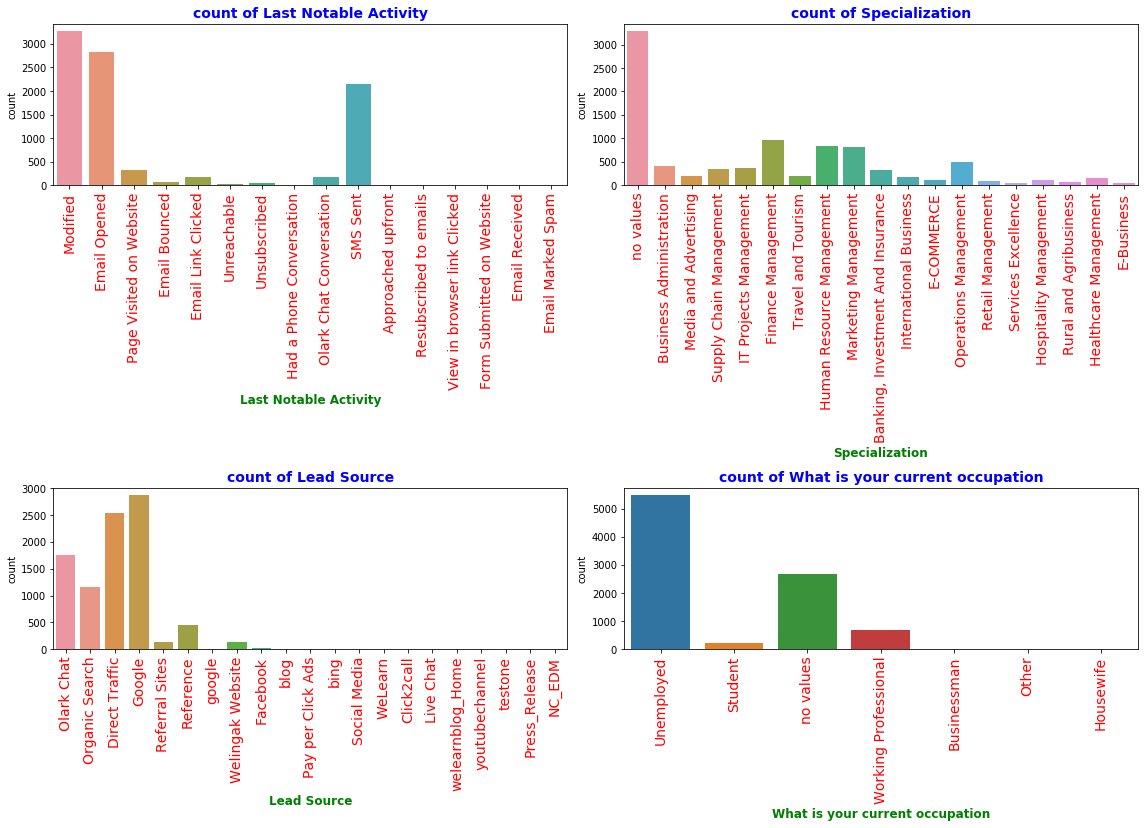

In [23]:
col2=['Last Notable Activity','Specialization','Lead Source','What is your current occupation']
plt.figure(figsize=(16,35))
for i in enumerate(col2):
        plt.subplot(6,2,i[0]+1)
        plt.title('count of'+ ' '+i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.countplot(lead_score1[i[1]])
        
        plt.xticks(rotation = 90,fontsize=14,color='r')
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

## Inference
- From above plots we can infer, since count values are spread across different headers creating dummy wil help for fitting model

# Plotting numerical columns

In [24]:
lead_score1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

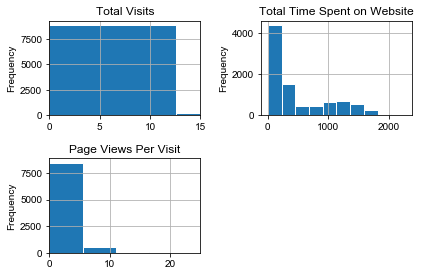

In [25]:
#col_numeric=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
fig, axes = plt.subplots(2,2)
sns.set(rc={'figure.figsize':(15,8)})
#sns.plot(lead_score1.TotalVisits,bins=200,ax=axes[0][0], rug=True, rug_kws={"color": "g"})
lead_score1.TotalVisits.plot(kind='hist',ax=axes[0][0],bins=20)

axes[0,0].title.set_text('Total Visits')
axes[0,0].set_xlim(0,15)

#sns.distplot(lead_score1['Total Time Spent on Website'],bins=20,ax=axes[0][1])
lead_score1['Total Time Spent on Website'].plot(kind='hist',ax=axes[0][1])

axes[0,1].title.set_text('Total Time Spent on Website')


#sns.distplot(lead_score1['Page Views Per Visit'],bins=20,ax=axes[1][0])
lead_score1['Page Views Per Visit'].plot(kind='hist',ax=axes[1][0])
axes[1,0].title.set_text('Page Views Per Visit')
axes[1,0].set_xlim(0,25)
fig.delaxes(axes[1,1]) ## delete unused axes
plt.tight_layout()
plt.show()

## Inference
- ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
- above column are not bunched to one value, its spread across, so might be useful for fitting model

##  analysis on target variable - Converted with other variables

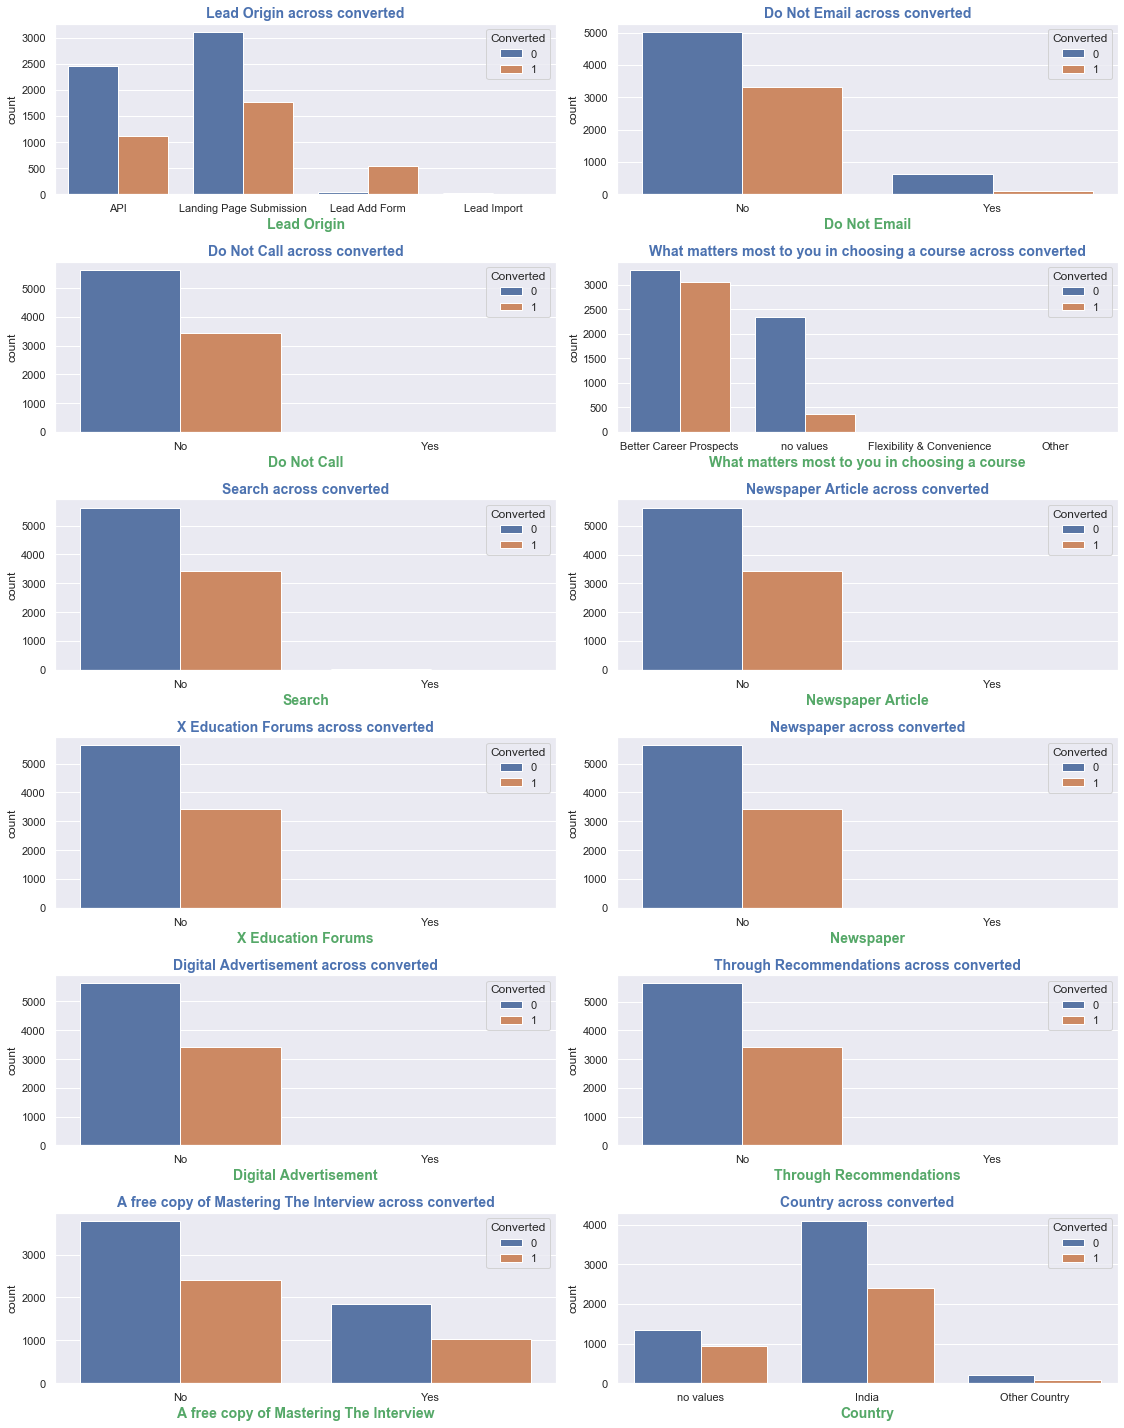

In [26]:
#count plot of all categorical data
col=['Lead Origin','Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Country']
plt.figure(figsize=(16,20))
handles=['0','1']
for i in enumerate(col):
        plt.subplot(6,2,i[0]+1)
        plt.title(i[1]+' '+'across converted',fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=14)
        
        sns.countplot(lead_score1[i[1]], hue=lead_score1['Converted'])

        legend = plt.legend(handles,title="Converted",loc=1)
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

## Inference
- From above plots we can infer number of convertions across all features is less when compared to not converted.
- There are more from numbers fromm India when compard to other countries.
- A free copy for Mastering the Interview & Country seem to have values which can make a difference in model fitting as other columns 'Yes' values are very minimal.

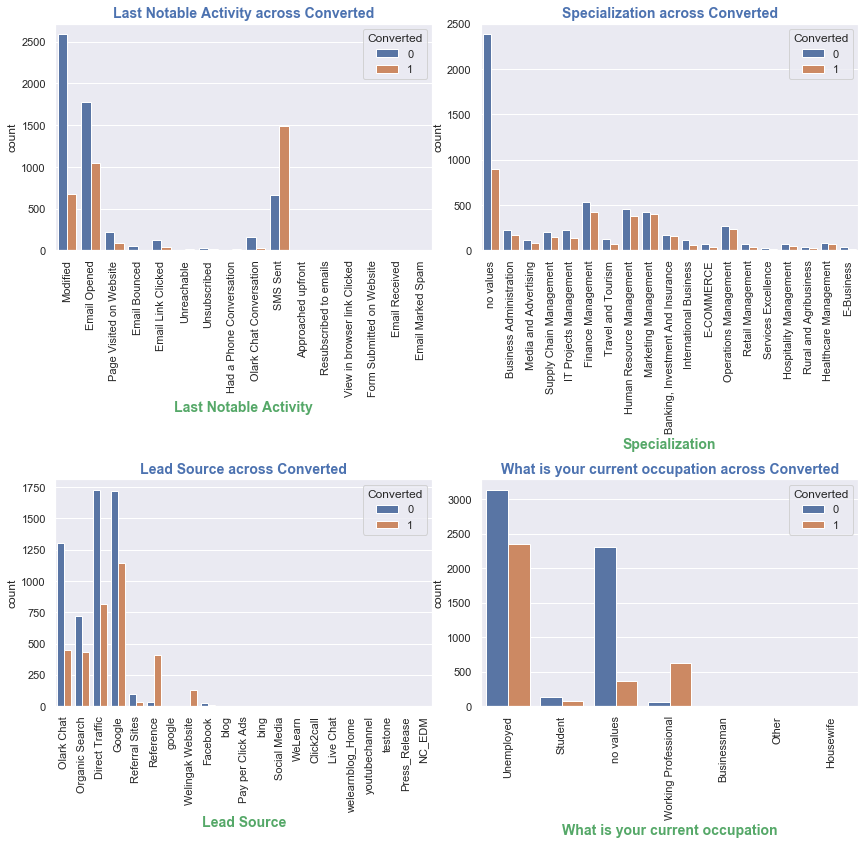

In [27]:
col1=['Last Notable Activity','Specialization','Lead Source','What is your current occupation']
plt.figure(figsize=(15,12))
handles=['0','1']
for i in enumerate(col1):
        plt.subplot(2,2,i[0]+1)
        plt.title(i[1]+' ' +'across Converted',fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=14)
        
        sns.countplot(lead_score1[i[1]], hue=lead_score1['Converted'])
        legend = plt.legend(handles,title="Converted",loc=1)
        plt.xticks(rotation=90)
plt.tight_layout() #auto matically adjust subplots into figure area


plt.subplots_adjust(bottom=0.01, right=0.8, top=0.8)
plt.show()

## Inference 
- Last Notable Activity plots shows 'SMS Sent,'Email Opened' are higher convertion rate
- Lead Source shows Google and Direct traffic has higer chance of convertion
- Umemployed people are more keen to join the courses

In [28]:
lead_score1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

## Outliers

In [29]:
#checking the numerical parameters
lead_score1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [30]:
# removing values above 95 percentile as there is large jump in values from 95 to 99 percentile  for TotalVisits
# removing (statistical) outliers

Q1 = lead_score1.TotalVisits.quantile(0.95)
lead_score1 = lead_score1[(lead_score1.TotalVisits <= Q1) ]


In [31]:
# removing values above 95 percentile as there is large jump in values from 95 to 99 percentile  for "Total Time Spent on Website"
# removing (statistical) outliers

Q1 = lead_score1['Total Time Spent on Website'].quantile(0.95)
lead_score1 = lead_score1[(lead_score1['Total Time Spent on Website'] <= Q1) ]

In [32]:
# removing values above 95 percentile as there is large jump in values from 95 to 99 percentile  for Page Views Per Visit
# removing (statistical) outliers

Q1 = lead_score1['Page Views Per Visit'].quantile(0.95)
lead_score1 = lead_score1[(lead_score1['Page Views Per Visit'] <= Q1) ]

In [33]:
lead_score1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Better Career Prospects,No,No,No,No,No,No,no values,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Better Career Prospects,No,No,No,No,No,No,no values,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [34]:
# Creating dummy variables for the variable 'What is your current occupation'
occupation = pd.get_dummies(lead_score1['What is your current occupation'], prefix='occupation')
# Dropping occupation_no values column -- as it coresponds to no vlaues provided and is of no use
occupation1 = occupation.drop(['occupation_no values'], 1)

In [35]:
# Creating dummy variables for the variable 'Lead Source'
Lead_source = pd.get_dummies(lead_score1['Lead Source'], prefix='lead_src',drop_first=True)
#Lead_source1 = Lead_source.drop(['lead_src_no values'], 1)

# Creating dummy variables for the variable 'Lead Origin'
Lead_origin = pd.get_dummies(lead_score1['Lead Origin'], prefix='lead_origin',drop_first=True)
#Lead_origin1 = Lead_origin.drop(['lead_origin_no values'], 1)

# Creating dummy variables for the variable 'Specialization'
Specialization = pd.get_dummies(lead_score1['Specialization'], prefix='specalisation')
Specialization = Specialization.drop(['specalisation_no values'], 1)


# Creating dummy variables for the variable 'Last Notable Activity'
Last_Activity = pd.get_dummies(lead_score1['Last Notable Activity'], prefix='last_Activity',drop_first=True)
#Last_Activity1 = Last_Activity.drop(['last_Activity_no values'], 1)

Countries = pd.get_dummies(lead_score1['Country'], prefix='country')
Countries1 = Countries.drop(['country_no values'], 1)

#How_did_hear = pd.get_dummies(lead_score1['How did you hear about X Education'], prefix='how_did_hear')
#How_did_hear1 = How_did_hear.drop(['how_did_hear_no values'], 1)

Cities = pd.get_dummies(lead_score1['City'], prefix='city')
Cities1 = Cities.drop(['city_no values'], 1)

master_interview_copy = pd.get_dummies(lead_score1['A free copy of Mastering The Interview'], prefix='master_interview',drop_first=True)

occupation = pd.get_dummies(lead_score1['What is your current occupation'], prefix='occupation')
occupation1 = occupation.drop(['occupation_no values'], 1)


In [36]:
#dropping original columns
lead_score2=lead_score1.drop(['Lead Source','Lead Origin','Specialization','Last Notable Activity','City','Country','A free copy of Mastering The Interview','What is your current occupation'],axis=1)

In [37]:
#concat all dummies dataframe with original dataframe and create new dataframe
lead_score3=pd.concat([lead_score2,Lead_source,Lead_origin,Specialization,Last_Activity,Countries1,Cities1,master_interview_copy,occupation1],axis=1)

In [38]:
##chcking values of columns to see the values are more baised ot one value in each of these columns
cols=['Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
for i in enumerate(cols):
    print(i[1])
    print(lead_score1[i[1]].value_counts())

Do Not Email
No     7401
Yes     626
Name: Do Not Email, dtype: int64
Do Not Call
No     8025
Yes       2
Name: Do Not Call, dtype: int64
What matters most to you in choosing a course
Better Career Prospects      5540
no values                    2485
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64
Search
No     8021
Yes       6
Name: Search, dtype: int64
Newspaper Article
No    8027
Name: Newspaper Article, dtype: int64
X Education Forums
No    8027
Name: X Education Forums, dtype: int64
Newspaper
No    8027
Name: Newspaper, dtype: int64
Digital Advertisement
No     8025
Yes       2
Name: Digital Advertisement, dtype: int64
Through Recommendations
No     8024
Yes       3
Name: Through Recommendations, dtype: int64


## Inferecne
- fromm value counts we can see all thse column have very big mismatch in number of records for each value, so they would be of no use in momdelling hence dropping them
    - Do Not Email
    - Do Not Call
    - What matters most to you in choosing a course
    - Search
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations

In [39]:
## Dropping columns as these offer no help in fitting model as per above inference
# Prospect id is dropped as we have lead number as unique id
lead_score3.drop(['Prospect ID','Do Not Email','Do Not Call','Through Recommendations','What matters most to you in choosing a course','X Education Forums','Newspaper Article','Digital Advertisement','Newspaper','Search','Last Activity'],axis=1,inplace=True)

In [40]:
#chcking data frame after creation of dummies and see there are no object data type
lead_score3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8027 entries, 0 to 9239
Data columns (total 76 columns):
Lead Number                                        8027 non-null int64
Converted                                          8027 non-null int64
TotalVisits                                        8027 non-null float64
Total Time Spent on Website                        8027 non-null int64
Page Views Per Visit                               8027 non-null float64
lead_src_Direct Traffic                            8027 non-null uint8
lead_src_Facebook                                  8027 non-null uint8
lead_src_Google                                    8027 non-null uint8
lead_src_Live Chat                                 8027 non-null uint8
lead_src_NC_EDM                                    8027 non-null uint8
lead_src_Olark Chat                                8027 non-null uint8
lead_src_Organic Search                            8027 non-null uint8
lead_src_Pay per Click Ads           

## Inferencce
- total of 8027 rows and 76 columns are used in modelling

## Splitting dataframe to Test and train

In [41]:
# Putting feature variable to X
# taking all column except target valriable (COnverted) and lead number in X
X = lead_score3.drop(['Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lead_src_Direct Traffic,lead_src_Facebook,lead_src_Google,lead_src_Live Chat,lead_src_NC_EDM,lead_src_Olark Chat,lead_src_Organic Search,...,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,master_interview_Yes,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Putting response variable to y
y = lead_score3['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling of numerical columns

In [44]:
## Using standard scalar to convert numberical values
col_scale=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lead_src_Direct Traffic,lead_src_Facebook,lead_src_Google,lead_src_Live Chat,lead_src_NC_EDM,lead_src_Olark Chat,lead_src_Organic Search,...,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,master_interview_Yes,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
2626,-1.158807,-0.860855,-1.229836,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2973,0.563804,0.097800,1.185400,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5392,-0.728154,-0.109591,-0.626027,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8344,-1.158807,-0.860855,-1.229836,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1763,0.133151,-0.287355,0.581591,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


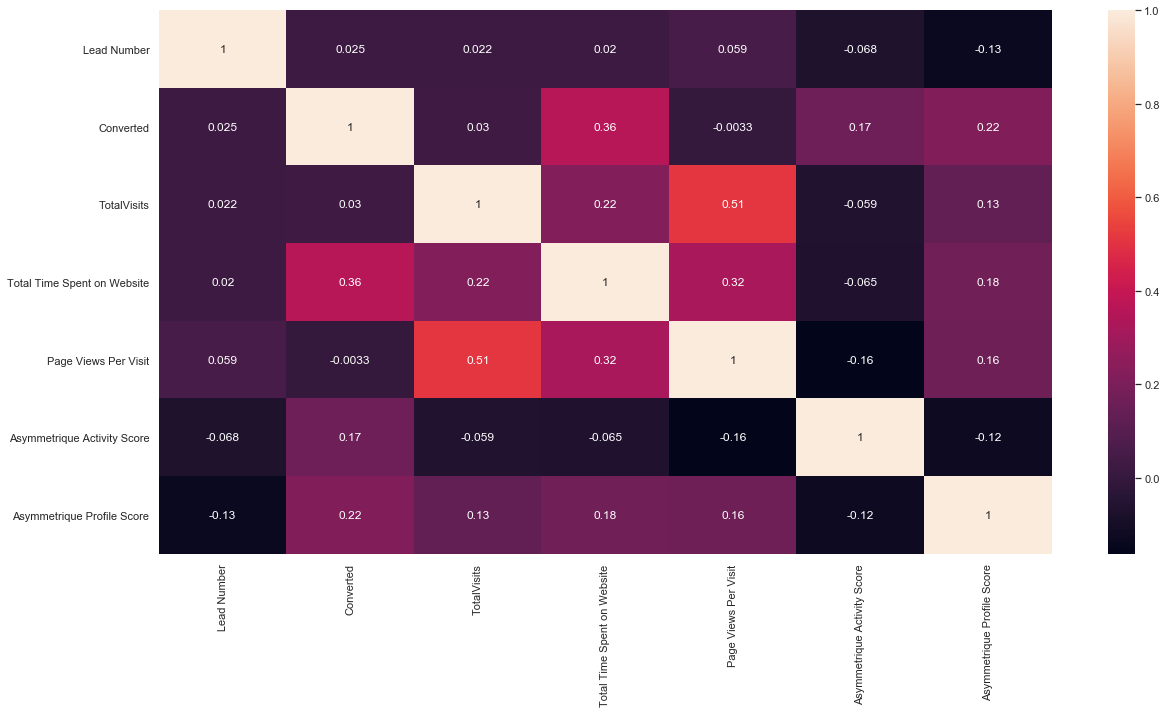

In [45]:
# Let's see the correlation matrix for original deataframe colums as VIF will be used for all dummies later
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_score.corr(),annot = True)
plt.show()

## Inference
- Total visits and Page view per visit have correlation(not very high).
- Converted and Total time spent on website also has +ve correlation, not vey high but significant
- Page per visit and Total time spent on websitte also show +ve correlation

## Feature Selection using RFE

In [46]:
# feature selection using RFE
# Taking top 15 features
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [47]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False,  True])

In [48]:
## checking RFE ranking and selected features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('lead_src_Direct Traffic', False, 16),
 ('lead_src_Facebook', False, 8),
 ('lead_src_Google', False, 34),
 ('lead_src_Live Chat', False, 44),
 ('lead_src_NC_EDM', False, 56),
 ('lead_src_Olark Chat', False, 51),
 ('lead_src_Organic Search', False, 33),
 ('lead_src_Pay per Click Ads', False, 46),
 ('lead_src_Press_Release', False, 49),
 ('lead_src_Reference', False, 13),
 ('lead_src_Referral Sites', False, 32),
 ('lead_src_Social Media', False, 14),
 ('lead_src_WeLearn', False, 39),
 ('lead_src_Welingak Website', True, 1),
 ('lead_src_bing', False, 45),
 ('lead_src_blog', False, 48),
 ('lead_src_google', False, 31),
 ('lead_src_testone', False, 41),
 ('lead_src_welearnblog_Home', False, 57),
 ('lead_src_youtubechannel', False, 52),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 28),
 ('specalisati

In [49]:
## taking all column given by RFE
col = X_train.columns[rfe.support_]

In [50]:
#checking the column names
col

Index(['Total Time Spent on Website', 'lead_src_Welingak Website',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'last_Activity_Had a Phone Conversation', 'last_Activity_SMS Sent',
       'last_Activity_Unreachable', 'country_Other Country', 'city_Mumbai',
       'city_Other Cities', 'city_Other Cities of Maharashtra',
       'city_Other Metro Cities', 'city_Thane & Outskirts',
       'occupation_Housewife', 'occupation_Working Professional'],
      dtype='object')

In [51]:
## chcekcing the columns not picked by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'lead_src_Direct Traffic',
       'lead_src_Facebook', 'lead_src_Google', 'lead_src_Live Chat',
       'lead_src_NC_EDM', 'lead_src_Olark Chat', 'lead_src_Organic Search',
       'lead_src_Pay per Click Ads', 'lead_src_Press_Release',
       'lead_src_Reference', 'lead_src_Referral Sites',
       'lead_src_Social Media', 'lead_src_WeLearn', 'lead_src_bing',
       'lead_src_blog', 'lead_src_google', 'lead_src_testone',
       'lead_src_welearnblog_Home', 'lead_src_youtubechannel',
       'lead_origin_Lead Import',
       'specalisation_Banking, Investment And Insurance',
       'specalisation_Business Administration', 'specalisation_E-Business',
       'specalisation_E-COMMERCE', 'specalisation_Finance Management',
       'specalisation_Healthcare Management',
       'specalisation_Hospitality Management',
       'specalisation_Human Resource Management',
       'specalisation_IT Projects Management',
       'specalisation_International Bus

In [52]:
# fitting model with RFE selected features and seeing the statistics summary
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2357.6
Date:                Sun, 06 Dec 2020   Deviance:                       4715.2
Time:                        14:13:31   Pearson chi2:                 5.65e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3881      0.065    -21.444      0.000      -1.515      -1.261
Total Time Spent on Website                0.9680      0.038     25.308      0.000       0.893       1.043
lead_src_Welingak Website                  1.9676      0.759      2.593      0.010       0.481       3.455
lead_origin_Landing Page Submission       -1.5313      0.136    -11.271      0.000      -1.798      -1.265
lead_origin_Lead Add Form                  3.2464      0.243     13.341      0.000       2.769       3.723
last_Activity_Had a Phone Conversation     2.9044      1.189      2.443      0.015       0.574       5.234
last_Activity_SMS Sent                     1.7820      0.083     21.427      0.000       1.619       1.945
last_Activity_Unreachable                  1.8444      0.726      2.540      0.011       0.421       3.268
country_Other Country                     -0.4666      0.224     -2.083      0.037      -0.906      -0.028
city_Mumbai                                1.0653      0.141      7.548      0.000       0.789       1.342
city_Other Cities                          1.0959      0.181      6.056      0.000       0.741       1.451
city_Other Cities of Maharashtra           1.3259      0.201      6.593      0.000       0.932       1.720
city_Other Metro Cities                    1.1321      0.215      5.273      0.000       0.711       1.553
city_Thane & Outskirts                     1.2473      0.174      7.162      0.000       0.906       1.589
occupation_Housewife                      22.5304   1.15e+04      0.002      0.998   -2.25e+04    2.25e+04
occupation_Working Professional            2.7777      0.190     14.657      0.000       2.406       3.149
==========================================================================================================
"""

## Inference
- Fromt the summary statistics we can see occupation_Housewife has very high p-value , hence we need to drop the column.

In [53]:
# dropping higher p value occupation_Housewife
col=col.drop(['occupation_Housewife'])


In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# checking VIF after dropping high p value column
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,6.57
8,city_Mumbai,4.31
9,city_Other Cities,1.70
3,lead_origin_Lead Add Form,1.67
12,city_Thane & Outskirts,1.67
10,city_Other Cities of Maharashtra,1.48
11,city_Other Metro Cities,1.45
1,lead_src_Welingak Website,1.33
5,last_Activity_SMS Sent,1.30
13,occupation_Working Professional,1.20


## Inference
- lead_origin_Landing Page Submission has VIF of >5 hence dropping it

In [55]:
## Dropping lead_origin_Landing Page Submission	 becaus eof high vIF
col=col.drop(['lead_origin_Landing Page Submission'])


In [56]:
#Fittin model again after removing high VIF feature and checking stats summary
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5604
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2428.8
Date:                Sun, 06 Dec 2020   Deviance:                       4857.5
Time:                        14:13:32   Pearson chi2:                 5.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.4669      0.064    -22.886      0.000      -1.593      -1.341
Total Time Spent on Website                0.9172      0.037     24.813      0.000       0.845       0.990
lead_src_Welingak Website                  1.5771      0.756      2.085      0.037       0.095       3.060
lead_origin_Lead Add Form                  3.8670      0.238     16.256      0.000       3.401       4.333
last_Activity_Had a Phone Conversation     2.8084      1.146      2.450      0.014       0.562       5.055
last_Activity_SMS Sent                     1.6941      0.081     20.799      0.000       1.534       1.854
last_Activity_Unreachable                  1.7283      0.716      2.413      0.016       0.325       3.132
country_Other Country                     -0.5221      0.218     -2.400      0.016      -0.949      -0.096
city_Mumbai                               -0.1720      0.087     -1.974      0.048      -0.343      -0.001
city_Other Cities                         -0.0847      0.144     -0.587      0.557      -0.367       0.198
city_Other Cities of Maharashtra           0.0858      0.166      0.517      0.605      -0.240       0.411
city_Other Metro Cities                   -0.1570      0.178     -0.884      0.376      -0.505       0.191
city_Thane & Outskirts                     0.0840      0.137      0.616      0.538      -0.184       0.352
occupation_Working Professional            2.7746      0.188     14.765      0.000       2.406       3.143
==========================================================================================================
"""

## Inference
- Can see lots of columns have high P value need to drop one by one and fit model again to see statistics
- dropping city_Other Cities of Maharashtra

In [57]:
## Dropping city_Other Cities of Maharashtra' because of high P value
col=col.drop(['city_Other Cities of Maharashtra'])

In [58]:
#checking the col atttributes left after dropping
col

Index(['Total Time Spent on Website', 'lead_src_Welingak Website',
       'lead_origin_Lead Add Form', 'last_Activity_Had a Phone Conversation',
       'last_Activity_SMS Sent', 'last_Activity_Unreachable',
       'country_Other Country', 'city_Mumbai', 'city_Other Cities',
       'city_Other Metro Cities', 'city_Thane & Outskirts',
       'occupation_Working Professional'],
      dtype='object')

In [59]:
#Fittin model again after removing high p value feature
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2428.9
Date:                Sun, 06 Dec 2020   Deviance:                       4857.8
Time:                        14:13:32   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.4561      0.060    -24.073      0.000      -1.575      -1.338
Total Time Spent on Website                0.9196      0.037     25.064      0.000       0.848       0.992
lead_src_Welingak Website                  1.5725      0.756      2.079      0.038       0.090       3.055
lead_origin_Lead Add Form                  3.8670      0.238     16.252      0.000       3.401       4.333
last_Activity_Had a Phone Conversation     2.8097      1.147      2.450      0.014       0.562       5.057
last_Activity_SMS Sent                     1.6956      0.081     20.827      0.000       1.536       1.855
last_Activity_Unreachable                  1.7366      0.716      2.424      0.015       0.332       3.141
country_Other Country                     -0.5169      0.217     -2.378      0.017      -0.943      -0.091
city_Mumbai                               -0.1845      0.084     -2.203      0.028      -0.349      -0.020
city_Other Cities                         -0.0976      0.142     -0.687      0.492      -0.376       0.181
city_Other Metro Cities                   -0.1699      0.176     -0.966      0.334      -0.515       0.175
city_Thane & Outskirts                     0.0715      0.134      0.532      0.595      -0.192       0.335
occupation_Working Professional            2.7772      0.188     14.782      0.000       2.409       3.145
==========================================================================================================
"""

In [60]:
## removing city_Thane & Outskirts because of high p value
col=col.drop(['city_Thane & Outskirts'])

In [61]:
#Fittin model again after removing high p value feature
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5606
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2429.0
Date:                Sun, 06 Dec 2020   Deviance:                       4858.1
Time:                        14:13:33   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.4440      0.056    -25.816      0.000      -1.554      -1.334
Total Time Spent on Website                0.9225      0.036     25.423      0.000       0.851       0.994
lead_src_Welingak Website                  1.5626      0.756      2.067      0.039       0.081       3.045
lead_origin_Lead Add Form                  3.8712      0.238     16.275      0.000       3.405       4.337
last_Activity_Had a Phone Conversation     2.8250      1.147      2.463      0.014       0.577       5.073
last_Activity_SMS Sent                     1.6956      0.081     20.826      0.000       1.536       1.855
last_Activity_Unreachable                  1.7481      0.714      2.448      0.014       0.349       3.147
country_Other Country                     -0.5178      0.218     -2.380      0.017      -0.944      -0.091
city_Mumbai                               -0.1981      0.080     -2.486      0.013      -0.354      -0.042
city_Other Cities                         -0.1113      0.140     -0.796      0.426      -0.385       0.163
city_Other Metro Cities                   -0.1836      0.174     -1.055      0.291      -0.525       0.157
occupation_Working Professional            2.7811      0.188     14.812      0.000       2.413       3.149
==========================================================================================================
"""

In [62]:
## removing city_Other Cities because of high p value
col=col.drop(['city_Other Cities'])

In [63]:
#Fittin model again after removing high p value feature
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5607
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2429.4
Date:                Sun, 06 Dec 2020   Deviance:                       4858.7
Time:                        14:13:33   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.4579      0.053    -27.379      0.000      -1.562      -1.354
Total Time Spent on Website                0.9197      0.036     25.482      0.000       0.849       0.990
lead_src_Welingak Website                  1.5663      0.756      2.072      0.038       0.084       3.048
lead_origin_Lead Add Form                  3.8723      0.238     16.285      0.000       3.406       4.338
last_Activity_Had a Phone Conversation     2.7961      1.144      2.445      0.015       0.554       5.038
last_Activity_SMS Sent                     1.6953      0.081     20.825      0.000       1.536       1.855
last_Activity_Unreachable                  1.7557      0.714      2.460      0.014       0.357       3.155
country_Other Country                     -0.5408      0.216     -2.506      0.012      -0.964      -0.118
city_Mumbai                               -0.1822      0.077     -2.361      0.018      -0.333      -0.031
city_Other Metro Cities                   -0.1667      0.173     -0.965      0.334      -0.505       0.172
occupation_Working Professional            2.7756      0.187     14.804      0.000       2.408       3.143
==========================================================================================================
"""

In [64]:
## removing city_Other Metro Cities because of high p value
col=col.drop(['city_Other Metro Cities'])

In [65]:
#Fittin model again after removing high p value feature
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5608
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2429.8
Date:                Sun, 06 Dec 2020   Deviance:                       4859.7
Time:                        14:13:33   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.4689      0.052    -28.194      0.000      -1.571      -1.367
Total Time Spent on Website                0.9169      0.036     25.500      0.000       0.846       0.987
lead_src_Welingak Website                  1.5707      0.756      2.077      0.038       0.089       3.052
lead_origin_Lead Add Form                  3.8756      0.238     16.304      0.000       3.410       4.341
last_Activity_Had a Phone Conversation     2.8019      1.144      2.449      0.014       0.560       5.044
last_Activity_SMS Sent                     1.6911      0.081     20.814      0.000       1.532       1.850
last_Activity_Unreachable                  1.7603      0.714      2.466      0.014       0.361       3.159
country_Other Country                     -0.5461      0.216     -2.532      0.011      -0.969      -0.123
city_Mumbai                               -0.1687      0.076     -2.223      0.026      -0.317      -0.020
occupation_Working Professional            2.7716      0.187     14.789      0.000       2.404       3.139
==========================================================================================================
"""

## Inference
- after manually dropping of features arrving at 9 features
- none of features have a high p value
- next step is to check the VIF

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead_origin_Lead Add Form,1.55
1,lead_src_Welingak Website,1.32
4,last_Activity_SMS Sent,1.22
8,occupation_Working Professional,1.19
7,city_Mumbai,1.12
0,Total Time Spent on Website,1.10
6,country_Other Country,1.01
3,last_Activity_Had a Phone Conversation,1.00
5,last_Activity_Unreachable,1.00


## Inference
- As we can none of features have high VIF, so no need to drop any features.
- we ccan take these as our final features

In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [68]:
# checkcing predicted probability values
y_train_pred[:10]

array([0.36188112, 0.20113117, 0.14955635, 0.09463918, 0.15028074,
       0.0825996 , 0.09463918, 0.24008617, 0.49260862, 0.09463918])

In [69]:
# creating a data frame with converted and converted probability vlaues along with Lead number as index
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.361881,2626
1,0,0.201131,2973
2,0,0.149556,5392
3,0,0.094639,8344
4,0,0.150281,1763


In [70]:
# creating predicted column by taking 0.5 as cutoff for converted probablity value
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.361881,2626,0
1,0,0.201131,2973,0
2,0,0.149556,5392,0
3,0,0.094639,8344,0
4,0,0.150281,1763,0


## Inference
- After creation if y train predicted  dataframe , need to create confusion matrix and check on other parameters about the model

In [71]:
# Confusion matrix created using libraries
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3224  365]
 [ 771 1258]]


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7977928088287647


## Inference
- Overall accuracy of prediction is close to 80% which can be cocnsidered good.

## Metrics beyond simply accuracy
- checking Sensitivity,SPecificity, Falsepositive and Positive predictive rate 

In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6200098570724495

In [75]:
# Let us calculate specificity
TN / float(TN+FP)

0.898300362217888

In [76]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.10169963778211201


In [77]:
# positive predictive value 
print (TP / float(TP+FP))

0.7751078250154035


In [78]:
# Negative predictive value
print (TN / float(TN+ FN))

0.807008760951189


## Inference
- High specificity means Means model is correctly identifying people who are not converted.
- Sensitivity is relatively low in case of 0.5 as cutoff
-  rate of prediction of +ve and -ve are good

In [79]:
# ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
# roc curve metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

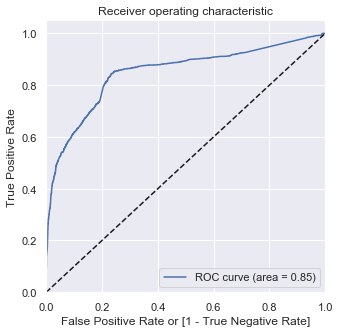

In [81]:
# plottin roc curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Inference
- we can see the plot is much far from the standard straigh line, indicating good model perfomance
- ROC curve area of 0.85 is good for the model

### Finding Optimal Cutoff Point

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.361881,2626,0,1,1,1,1,0,0,0,0,0,0
1,0,0.201131,2973,0,1,1,1,0,0,0,0,0,0,0
2,0,0.149556,5392,0,1,1,0,0,0,0,0,0,0,0
3,0,0.094639,8344,0,1,0,0,0,0,0,0,0,0,0
4,0,0.150281,1763,0,1,1,0,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.361161  1.000000  0.000000
0.1   0.1  0.538982  0.918679  0.324324
0.2   0.2  0.771271  0.862987  0.719420
0.3   0.3  0.794055  0.832923  0.772081
0.4   0.4  0.788181  0.706259  0.834494
0.5   0.5  0.797793  0.620010  0.898300
0.6   0.6  0.798149  0.539675  0.944274
0.7   0.7  0.787469  0.471168  0.966286
0.8   0.8  0.775009  0.414983  0.978546
0.9   0.9  0.728729  0.260227  0.993592


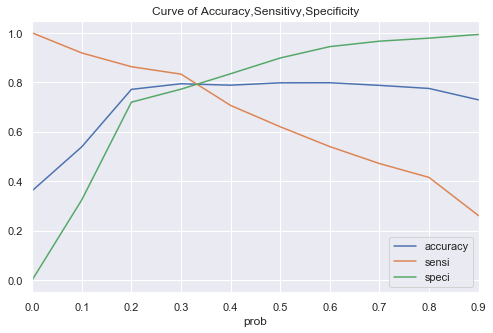

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(8,5))

plt.title('Curve of Accuracy,Sensitivy,Specificity')
plt.show()

## Inference
- Taking 0.33  as cutoff based on above plot where there is intersection of accuracy, sensitivity and Specificity
- also taking means form statiscs of sensitivity,specificity printedd above we can get a balanced model ahving ots values around 0.80(80 percentage)

In [85]:
## creating preicted dataframe with cut off value =0.33
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.361881,2626,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.201131,2973,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.149556,5392,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.094639,8344,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.150281,1763,0,1,1,0,0,0,0,0,0,0,0,0


In [86]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7936988252046991

## Inference
- overall acuuracy is around 80% which is good

In [87]:
# crating confusion matrix to check on other paramters
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2802,  787],
       [ 372, 1657]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8166584524396254

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.78071886319309

In [91]:
# Calculate false postive rate - predicting convertion when customer has not converted(opted for program)
print(FP/ float(TN+FP))

0.21928113680691


In [92]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6779869067103109


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8827977315689981


## Inference
- from the confusion metrics
- Sensitivity is increased to 81 percent which is as per requirment
- Specificity is 0.78 which is also not very far from 0.80 hence its good
- overall we can take this model with 0.33 as cutoff
- Since the rate of negative predicted value is higher, we can assume model wont suggest people who will not convert

## Precision and Recall


In [94]:
#creating confusion matrix for precision recall
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3224,  365],
       [ 771, 1258]], dtype=int64)

In [95]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7751078250154035

In [96]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6200098570724495

 ## Precision and recall trade off

In [97]:
#importing library for precision recall
from sklearn.metrics import precision_recall_curve

In [98]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

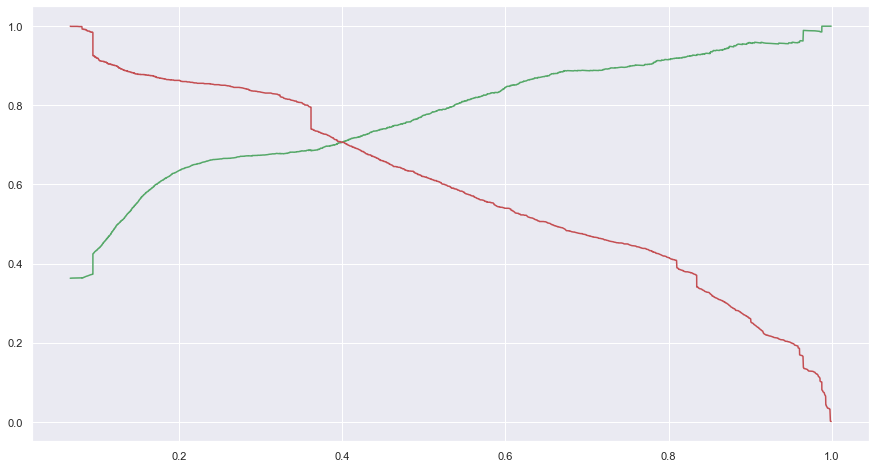

In [99]:
## Precision recall curve plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.show()

## Making Prediction of Test set

In [100]:
# scalling the Test set
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [101]:
# getting only the columns choosen after RfE and manual dropping of features
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,lead_src_Welingak Website,lead_origin_Lead Add Form,last_Activity_Had a Phone Conversation,last_Activity_SMS Sent,last_Activity_Unreachable,country_Other Country,city_Mumbai,occupation_Working Professional
2375,-0.416445,0,0,0,0,0,0,0,0
5128,-0.384701,0,0,0,1,0,0,1,0
2484,0.893505,0,0,0,0,0,0,0,0
2445,-0.850274,0,0,0,0,0,0,1,0
4014,-0.860855,0,0,0,0,0,0,1,0


In [102]:
#adding constant
X_test_sm = sm.add_constant(X_test)

## Making prediction on test set

In [103]:
#prediction on test set
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred[:10]

2375    0.135783
5128    0.425731
2484    0.343073
2445    0.081867
4014    0.081141
3185    0.834423
946     0.236564
1707    0.094639
4333    0.740644
89      0.461855
dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Let's see the head
y_pred_1.head()

,0
2375,0.135783
5128,0.425731
2484,0.343073
2445,0.081867
4014,0.081141


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,2375,0.135783
1,0,5128,0.425731
2,1,2484,0.343073
3,0,2445,0.081867
4,1,4014,0.081141


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [112]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,2375,0,0.135783
1,5128,0,0.425731
2,2484,1,0.343073
3,2445,0,0.081867
4,4014,1,0.081141


In [113]:
## using 0.33 as ccuttof on test set and creatinng the final predcited values
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.800747198007472

## Inference
- Accuracy in Test set is also around 80% which is as per train set data
- Model has correctly predicted

In [115]:
## creating confusion matrix for test data fro evaluation of parameters
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1241,  314],
       [ 166,  688]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8056206088992974

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.7980707395498392

In [119]:
y_pred_final.columns

Index(['Lead Number', 'Converted', 'Converted_Prob', 'final_predicted'], dtype='object')

In [120]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,2375,0,0.135783,0
1,5128,0,0.425731,1
2,2484,1,0.343073,1
3,2445,0,0.081867,0
4,4014,1,0.081141,0


## inference
- Overall model sensistivity = 80% and Specificity = 79.8% hence model is good

In [121]:
# below are final columns model has provided
col

Index(['Total Time Spent on Website', 'lead_src_Welingak Website',
       'lead_origin_Lead Add Form', 'last_Activity_Had a Phone Conversation',
       'last_Activity_SMS Sent', 'last_Activity_Unreachable',
       'country_Other Country', 'city_Mumbai',
       'occupation_Working Professional'],
      dtype='object')

## Suggestion 
- From the model we can ask the team to call to people from Mumbai and who are working professional.
- who have had phone conversatiton and who had a SMS Sent.
- People from other countries who have contacted also have higher rate of conversion